<a href="https://colab.research.google.com/github/WanjohiWanjohi/BCG_Forage_/blob/main/BCG_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import datetime
import pickle

In [3]:
#notebook settings
sns.set(color_codes=True)
%matplotlib inline
pd.set_option('display.max_columns', 100)

In [5]:
train_data  = pd.read_csv('ml_case_training_data.csv')
history_data = pd.read_csv('ml_case_training_hist_data.csv')
churn_data = pd.read_csv('ml_case_training_output.csv')

In [6]:
#join customer info
train=pd.merge(train_data, churn_data, on="id")

In [7]:
#train statistics
train.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,15970.000000,16096.000000,15970.000000,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000,16096.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,0.991547,70.309945,0.135901,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131,0.099093
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,5.160969,79.023251,0.026252,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421,0.298796
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000,0.000000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,0.000000,19.440000,0.142881,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000,0.000000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,0.000000,131.470000,0.146348,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000,0.000000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000,1.000000


From above we can obtain a lot of information about the dataset we are dealing with. For example, some key facts include:
1. The minimum consumption and forecasts for electricity and gas (yearly and monthly) are negative. This could mean that the client companies are producing energy and therefore energy should be "returned", although it is unlikely and we will consider it as corrupted data
2. The campaign_disc_ele is an empty column. We verify it by running train["campaign_disc_ele"].isnull().values.all()
3. Highly skewed data when we look at the percentiles

In [8]:
# check for null items
pd.DataFrame({"Missing values (%)": train.isnull().sum()/len(train.index)*100})

,Missing values (%)
id,0.000000
activity_new,59.300447
campaign_disc_ele,100.000000
channel_sales,26.205268
cons_12m,0.000000
cons_gas_12m,0.000000
cons_last_month,0.000000
date_activ,0.000000
date_end,0.012425
date_first_activ,78.205765


In order to decide whether or not to do away with the null , let us check out the volume

In [9]:
pd.DataFrame({"Missing values (%)": history_data.isnull().sum()/len(history_data.index)*100})

,Missing values (%)
id,0.000000
price_date,0.000000
price_p1_var,0.704138
price_p2_var,0.704138
price_p3_var,0.704138
price_p1_fix,0.704138
price_p2_fix,0.704138
price_p3_fix,0.704138


In [11]:
#explore the churning rate
churn=train[["id","churn"]]
# Rename columns for visualization purposes
churn.columns= ["Companies", "churn"]

In [14]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
  """    Plot stacked bars with annotations    """
  ax=dataframe.plot(kind="bar",stacked=True,figsize=size_,rot=rot_,title=title_)
  # Annotate bars
  annotate_stacked_bars(ax, textsize=14)
  # Rename legend
  plt.legend(["Retention", "Churn"], loc=legend_)
  # Labels
  plt.ylabel("Company base (%)")
  plt.show()
  
def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
  """    Add value annotations to the bars    """
  # Iterate over the plotted rectanges/bars
  for p in ax.patches:
    # Calculate annotation
    value=str(round(p.get_height(),1))
    # If value is 0 do not annotate
    if value=='0.0':
      continue
    ax.annotate(value,
                ((p.get_x()+p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
                color=colour,
                size=textsize
                )

In [15]:
churn_total=churn.groupby(churn["churn"]).count()
churn_percentage=churn_total/churn_total.sum()*10

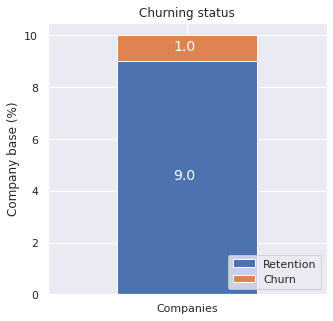

In [16]:
plot_stacked_bars(churn_percentage.transpose(),"Churning status", (5,5), legend_="lower right")

In [17]:
#Let's show the activity distribution of the companies as well as the sales channel.Intuitively this might be an important predictive feature
activity=train[["id","activity_new", "churn"]]
activity=activity.groupby([activity["activity_new"],activity["churn"]])["id"].count().unstack(level=1).sort_values(by=[0], ascending=False)

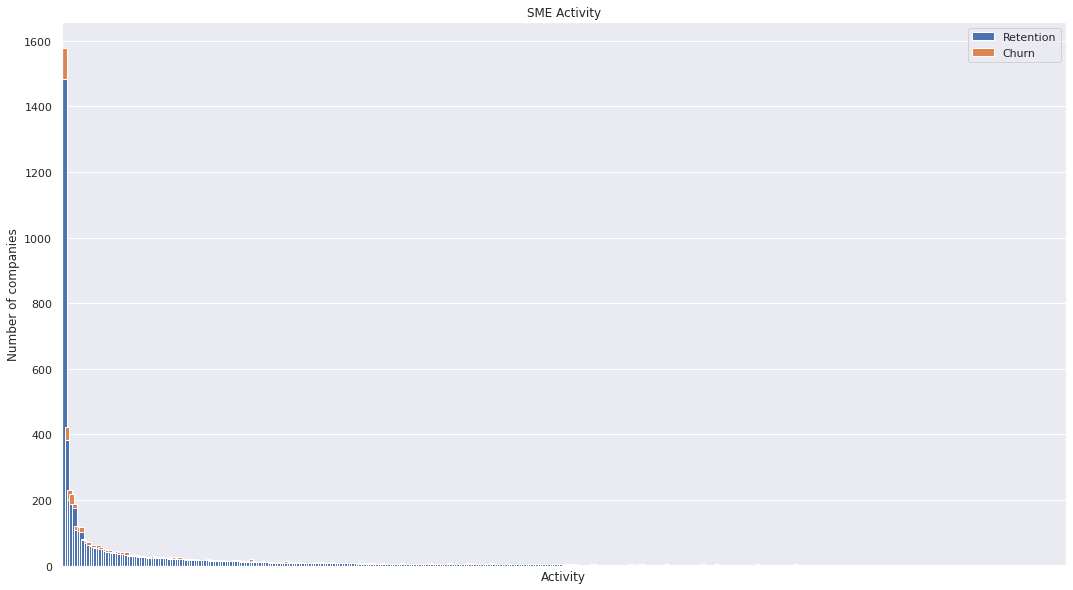

In [18]:
activity.plot(kind="bar",figsize=(18, 10),width=2,stacked=True,title="SME Activity")
# Labels
plt.ylabel("Number of companies")
plt.xlabel("Activity")
# Rename legend
plt.legend(["Retention", "Churn"], loc="upper right")
# Remove the label for the xticks as the categories are encoded and we can't draw any meaning from them yet
plt.xticks([])
plt.show()

Our predictive model is likely to struggle accurately predicting the the SME activity due to the large number of categories and lownumber of companies belonging to each category

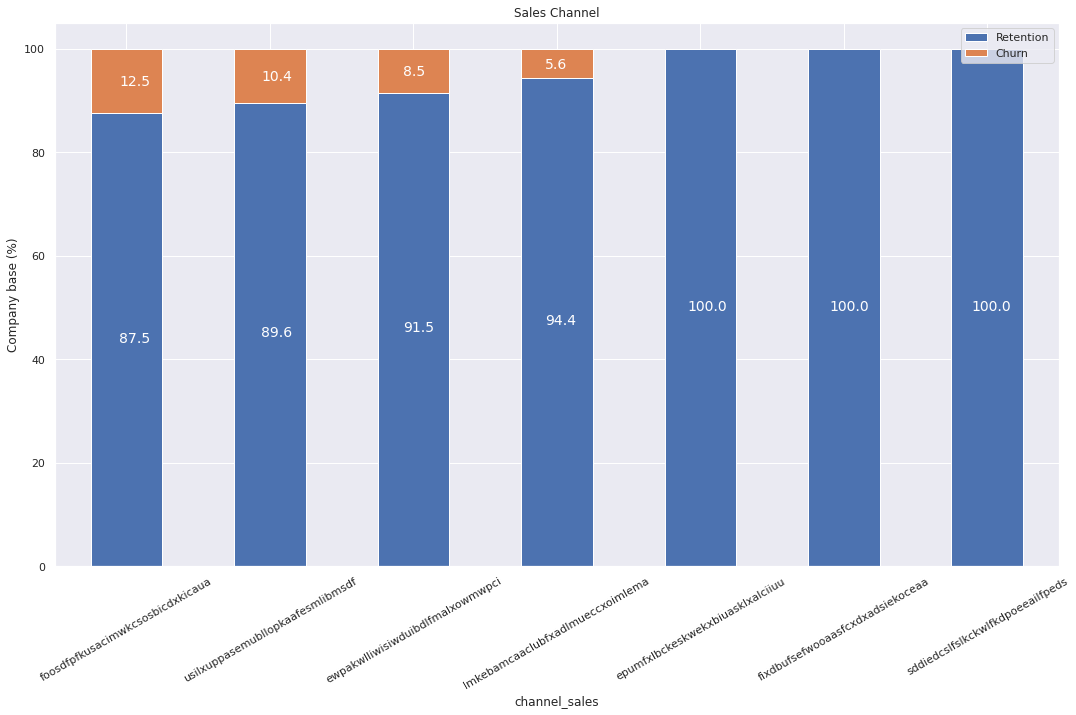

In [20]:
#check out the sales method 
channel=train[["id","channel_sales", "churn"]]
channel=channel.groupby([channel["channel_sales"],channel["churn"]])["id"].count().unstack(level=1).fillna(0)
channel_churn= (channel.div(channel.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)
plot_stacked_bars(channel_churn, "Sales Channel", rot_=30)

In [22]:
channel_total= channel.fillna(0)[0]+channel.fillna(0)[1]
channel_percentage=channel.fillna(0)[1]/(channel_total)*100
pd.DataFrame({"Churn percentage": channel_percentage,"Total companies": channel_total }).sort_values(by="Churn percentage",ascending=False).head(10)

,Churn percentage,Total companies
channel_sales,,
foosdfpfkusacimwkcsosbicdxkicaua,12.498306,7377.0
usilxuppasemubllopkaafesmlibmsdf,10.387812,1444.0
ewpakwlliwisiwduibdlfmalxowmwpci,8.488613,966.0
lmkebamcaaclubfxadlmueccxoimlema,5.595755,2073.0
epumfxlbckeskwekxbiuasklxalciiuu,0.000000,4.0
fixdbufsefwooaasfcxdxadsiekoceaa,0.000000,2.0
sddiedcslfslkckwlfkdpoeeailfpeds,0.000000,12.0


The sales channel 'foosdfpfkusacimwkcsosbicdxkicaua' is respnsible for most of the sales and thus it makes sense for it to account for a lager churn percentage

In [ ]:
#consumption distribution over the past year 
consumption=train[["id","cons_12m", "cons_gas_12m","cons_last_month", "imp_cons", "has_gas", "churn"]]


To easily visualize unvariate data , use a histogram 